# Here we make a Random Forest Model For Synechococcus


In [30]:
# Running model preperation notebook that has a function we need to call
%run /Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/python/04_Populations-model-fitting/01_model-preparation.ipynb


In [31]:
#loading packages for random forest modeling

from sklearn.model_selection import train_test_split
import joblib

## RF Regressor for Synechococcus

In [32]:
# creating a df, labels and features with only for the observed Synechococcus
population_name = 'Synechococcus'

pop_df, labels, features, feature_list = preprocess_single_population(covari, population_name)

In [33]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets"
train_features, test_features, train_labels, test_labels = train_test_split(features_syn, labels_syn, test_size = 0.75, random_state = 42)

In [34]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (714, 21)
Training Labels Shape: (714,)
Testing Features Shape: (2144, 21)
Testing Labels Shape: (2144,)


In [35]:
train_labels

array([5.05096366e+00, 1.90007460e+00, 4.64368037e-01, 1.22804418e+00,
       1.20094675e+01, 5.82175665e+00, 6.32885342e+00, 1.52976401e+00,
       3.23978809e-01, 2.97335763e-01, 2.32650964e+00, 8.60323354e-01,
       6.16473011e-01, 1.25510775e+00, 5.33953120e-01, 4.38810581e-01,
       9.97065926e-01, 4.35600434e-01, 1.16158844e+00, 4.09984697e-01,
       6.73574194e-01, 3.99178343e-01, 2.57336766e+00, 2.11962764e+00,
       5.93679676e+00, 2.97463872e-01, 1.00307300e+00, 3.73815834e+00,
       1.39769276e+00, 2.77855121e-01, 1.62153974e+00, 1.32597167e+00,
       3.37399539e-01, 1.30254045e+00, 2.51523624e-01, 3.67309529e-01,
       2.06029249e+00, 3.46683034e-01, 1.88142899e+00, 8.34689457e-01,
       2.88391706e+00, 3.78879776e-01, 1.54841228e+00, 3.67003704e+00,
       6.11196914e+00, 5.23521543e-01, 8.68617699e-01, 1.93407998e+00,
       6.74334450e+00, 3.15331236e-01, 1.99568852e+00, 2.11289627e+00,
       6.03848851e+00, 2.28137028e+00, 3.76848880e-01, 6.27132458e-01,
      

In [36]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Use the Training data to build the model
rf.fit(train_features, train_labels)
#saving the model
joblib.dump(rf, "/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/syn_random_forest.joblib")


['/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/syn_random_forest.joblib']

### Predicting and Testing for Synechococcus

In [37]:
# Convert test_features to a DataFrame
test_features_df = pd.DataFrame(test_features, columns=feature_list)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Create a new Series with predicted values and index from test_features_df
predic_biomass = pd.Series(predictions, index=test_features_df.index)

# Assign the new Series to the DataFrame as a new column
pop_df['Prediction'] = predic_biomass

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.62 pgC per L.
Accuracy: -51.22 %.


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_6055/1849695089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df['Prediction'] = predic_biomass


In [38]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [39]:
pd.DataFrame(rf.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

,0
salin,0.432788
temp,0.292923
DIC,0.039285
FeT,0.020299
NH4,0.018839
PON,0.018827
O2,0.018112
POC,0.015082
PIC,0.014866
NO2,0.014836


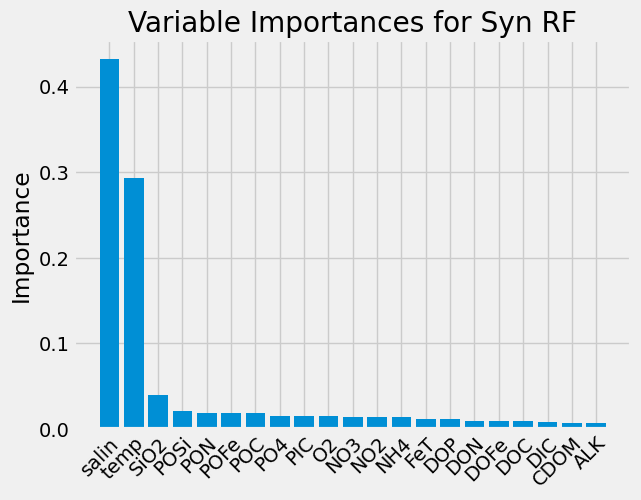

In [40]:
feature_importance = pd.DataFrame(rf.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=feature_importance.index,height=feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Syn RF');

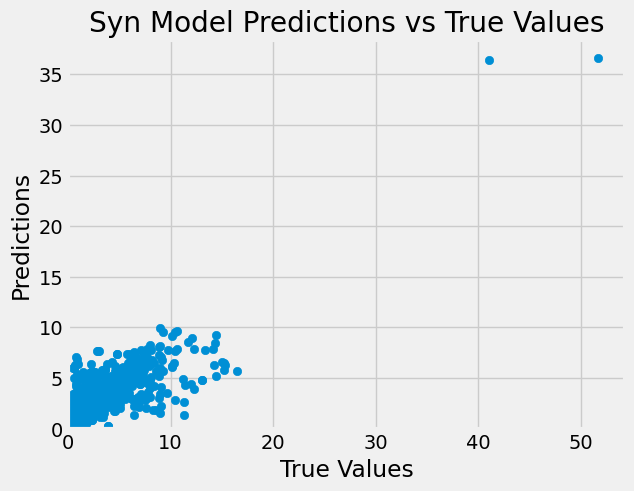

In [41]:
fig, ax = plt.subplots()
ax.scatter(test_labels, predictions)
ax.set_title('Syn Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

plt.show()

# run the model on each individual populaton - see which does best
#put zero values when 